My goal is to show a Bézier curve that is roughly in the shape of
a sail and that also shows a few vectors along the outside edge 
which are normal to the curve and have a length proportional to 
the curvature at that point.

For simplicity, I will use a formula, r(t) which is curved between 
point A and point C, but has its control point, B arranged such that 
the control point is on the curve.
$$\mathbf{r(t)}=(1-t)^2\cdot A + 2(1-t)t \left(2B-\frac{A}{2} - \frac{C}{2} \right) + t^2C,\quad 0\leq t\leq 1$$

next we need to form its vector derivative:
$$\mathbf{r^{\prime}} = -2A(1-\lambda)+2C\lambda-2\lambda\left(-\frac{A}{2}+2B-\frac{C}{2}\right)+2\left(1-\lambda\right)\left(-\frac{A}{2}+2B-\frac{C}{2}\right)$$
In order to calculate curvature, we will also use the second derivative, and a cross product, despite being in 2d.
We will define the cross2d product as the determinant of the two vectors. For 2D vectors or points the result is the z-coordinate of the actual cross product, considering that the usual k (as in i,j,k) value is $(0,0)$.
Finally, we will need a second derivative and note that in this case, it is not $\lambda$ dependent.
$$\mathbf{r^{\prime\prime}=}-4\left(-\frac{A}{2}+2B-\frac{C}{2}\right)+2A+2C$$

Next we want the curvature, $$\kappa=\frac{\left\Vert \overset{\centerdot}{\mathbf{r}}(t)\otimes\overset{\centerdot\centerdot}{\mathbf{r}}(t)\right\Vert }{\left\Vert \overset{\centerdot}{\mathbf{r}}(t)\right\Vert ^{3}}$$ This is a general definition for 3d, but it works in 2d when the cross2d product is defined.

Instead of drawing a normal line at the point, we want to draw a proportional length arrow.  The length will be proportional to curvature, while the direction will be the direction vector of the normal line.  In 2d, this is most easily obtained by switching the $x,y$ pair values of the tangent vector and changing the sign of one of them. Right now, I do not know what the proportionality constant should be, however, it will eventually be set proportional to wind strength on the sail. However, wind strength on the sail will change the sail shape (i.e. curve shape), and i do not currently have information about those changes.


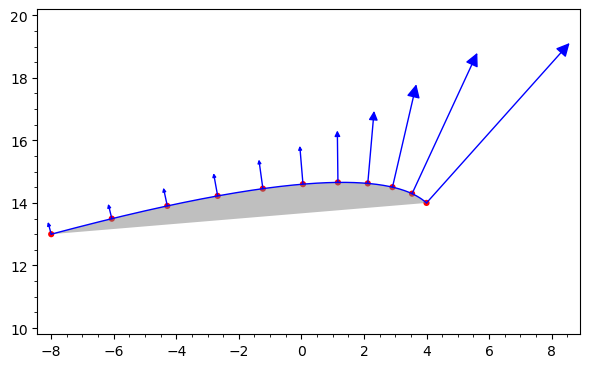

In [79]:
def drawarrow(direction_vector,strt_point,length):
    P = strt_point;
    Q= P + length*direction_vector
    asize = 10*length;
    if asize>4:
        asize = 4;
    if asize<1:
        asize=1;
    return arrow(P,Q,width=1,arrowsize=asize)

def cross2d(a,b):
    return a[0]*b[1] - a[1]*b[0];

var('t');
GP = plot([],frame=true,axes=false,ymin = 10,ymax=20);
A = vector((-8,13));
C = vector((4,14));
B = vector((0.05,14.6)); #B = vector((0.22,15.36));
r = (1-t)^2*A+2*(1-t)*t*(2*B-A/2 -C/2) + t^2*C; #r(t)
#Next line is the curve of the sail
GP += parametric_plot(((1-t)^2*A[0]+2*(1-t)*t*(2*B[0]-A[0]/2 \
                    -C[0]/2)+ t^2*C[0],(1-t)^2*A[1] \
                    +2*(1-t)*t*(2*B[1]-A[1]/2 -C[1]/2) + t^2*C[1] ), (t, 0, 1),fill=true)

rp = -2*A*(1-t) + 2*C*t - 2*t*(-A/2+2*B-C/2)+2*(1-t)*(-A/2+2*B-C/2); #r'(t)
rpp = -4*(-A/2 + 2*B -C/2) + 2*A + 2*C; #r''(t); #rpp is a vector but not a function of t
n  = vector((-rp[1],rp[0])); #n(t) is the vector normal for curve r at point r(t)
#k = abs()/abs()^3
for i in range(11):
    j=i/10
    P = r(j); #an arbitrary point on the curve
    GP += point(P, size=20, color='red');  #my custom point P
#GP += parametric_plot((rp(3/4)[0]*t + P[0],rp(3/4)[1]*t+P[1]),(t,0,1)); #how to use the rp(q) function in plot
    k = abs(cross2d(rp(j),rpp))/abs(rp(j))^3; #calculate the curvature at the t of the point
#print('k = ',k)
#GP +=  parametric_plot((n(3/4)[0]*t  + P[0], n(3/4)[1]*t+P[1]),(t,0,1)); #the normal line
    GP += drawarrow(n(j),P,k*2)

#
show(GP);

In [48]:

#rp.cross_product(rpp)
a = vector((1,2)); b = vector((4,5));
print(cross2d(a,b))

    

-3
